In [34]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.preprocessing import LabelEncoder
cropnpk=pd.read_csv("croprec.csv")

In [35]:
cropnpk.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [47]:
cropnpk.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2227,148,80,145,18.0,67.0,6.5,650.0,onion
2228,120,60,70,20.0,70.0,6.1,610.0,cabbage
2229,130,70,95,17.0,73.0,6.9,690.0,cabbage
2230,140,80,120,16.0,75.0,6.5,650.0,cabbage
2231,170,90,138,21.0,77.0,6.3,630.0,cabbage


In [36]:
cropnpk.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [37]:
cropnpk.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [38]:
cropnpk['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee', 'tea ',
       'cardamom', 'clove', 'clove ', 'black pepper', 'black pepper ',
       'potato ', 'tomato ', 'onion ', 'cabbage '], dtype=object)

In [39]:
cropnpk['label'].value_counts()

rice             100
grapes           100
coffee           100
jute             100
cotton           100
coconut          100
papaya           100
maize            100
apple            100
muskmelon        100
watermelon       100
orange           100
mango            100
pomegranate      100
lentil           100
blackgram        100
mungbean         100
mothbeans        100
pigeonpeas       100
kidneybeans      100
chickpea         100
banana           100
potato             4
onion              4
tomato             4
tea                4
cardamom           4
cabbage            4
black pepper       3
clove              3
black pepper       1
clove              1
Name: label, dtype: int64

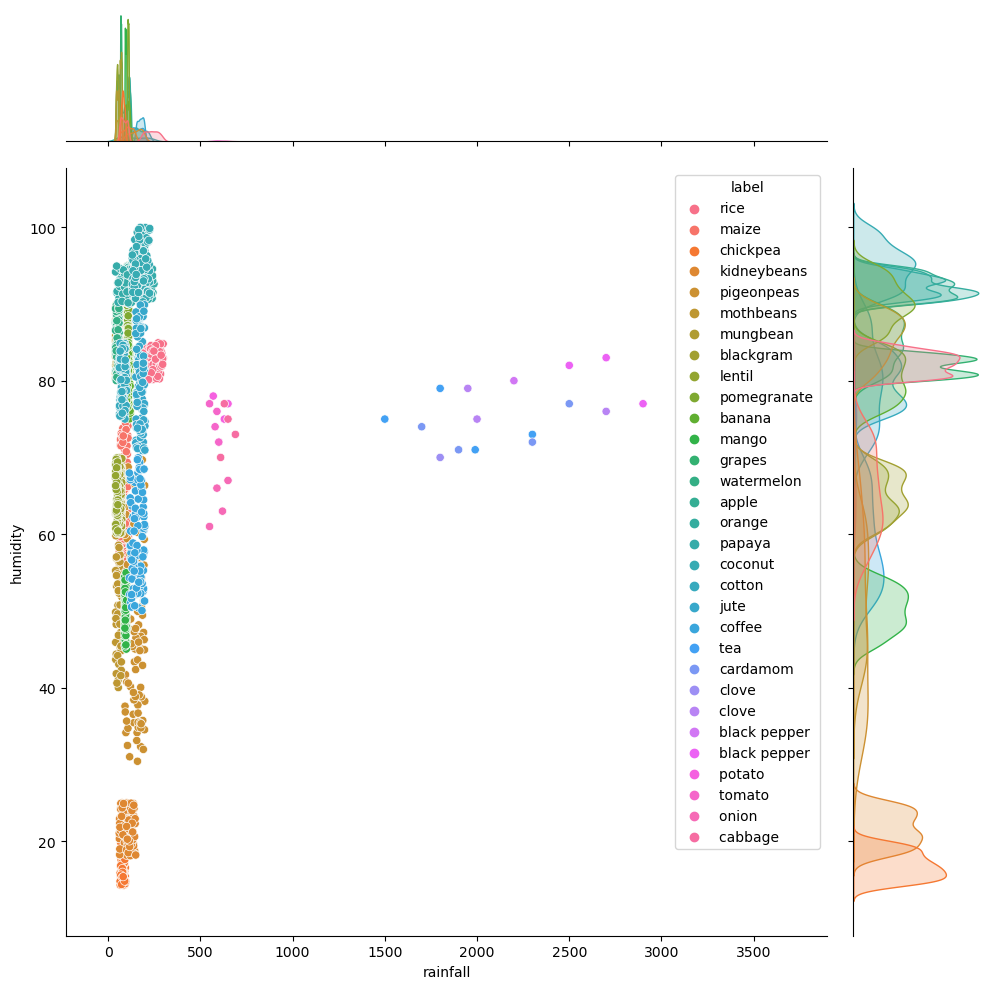

In [40]:

sns.jointplot(x="rainfall",y="humidity",data=cropnpk[(cropnpk['temperature']<40) & 
                                                  (cropnpk['rainfall']>40)],height=10,hue="label")

In [41]:
feats= cropnpk[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
targ=cropnpk['label']

In [42]:
accuracy=[]
mod=[]
#train and test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(feats,targ,test_size = 0.2,random_state =2)

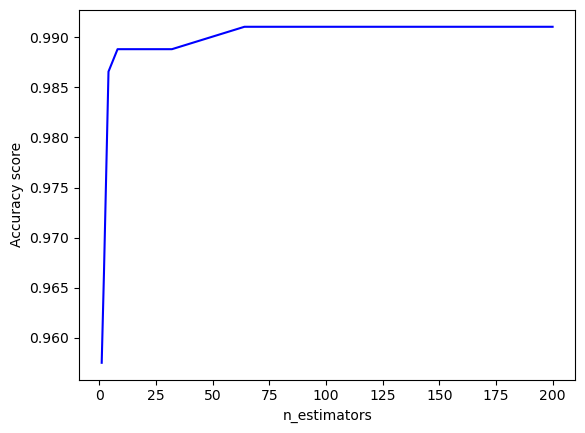

In [43]:
from sklearn.ensemble import RandomForestClassifier
acc_score = []
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
for i in n_estimators:
    RF = RandomForestClassifier(n_estimators=i, random_state=2)
    RF.fit(Xtrain,Ytrain)
    predicted_values = RF.predict(Xtest)

    x = metrics.accuracy_score(Ytest, predicted_values)
    acc_score.append(x) 
    
plt.plot(n_estimators, acc_score, 'b', label='Accuracy')
plt.ylabel('Accuracy score')
plt.xlabel('n_estimators')
plt.show()    


In [45]:
acc_score
RF = RandomForestClassifier(n_estimators=16, random_state=2)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)                         #accuracy
mod.append('RF')                   #model name
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9888143176733781
               precision    recall  f1-score   support

        apple       1.00      1.00      1.00        24
       banana       1.00      1.00      1.00        20
black pepper        0.00      0.00      0.00         1
    blackgram       1.00      1.00      1.00        22
     cabbage        0.00      0.00      0.00         1
     chickpea       1.00      1.00      1.00        21
      coconut       1.00      1.00      1.00        23
       coffee       1.00      1.00      1.00        23
       cotton       1.00      1.00      1.00        17
       grapes       1.00      1.00      1.00        23
         jute       0.91      0.95      0.93        21
  kidneybeans       1.00      1.00      1.00        17
       lentil       1.00      1.00      1.00        20
        maize       1.00      1.00      1.00        19
        mango       1.00      1.00      1.00        23
    mothbeans       1.00      1.00      1.00        19
     mungbean       1.00  

C:\Users\Shreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shreya\anaconda3\lib\site-packages\sklearn\metrics\

In [48]:
data = np.array([[120,60,70,20,70,6.1,610]])
prediction = RF.predict(data)
print(prediction)

['cabbage ']


C:\Users\Shreya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
